<a href="https://colab.research.google.com/github/ming-zhao/AIML_for_Business/blob/main/Linear_Regression_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

title: Neural Networks
author: Ming Zhao
date: "{{ datetime.now().strftime('%Y-%m-%d') }}"

In [ ]:
# -.-|m { input: false, output: false, output_error: false}
%load_ext pretty_jupyter

<p><a href="https://colab.research.google.com/github/ming-zhao/AIML_for_Business/blob/main/Linear_Regression_and_Decision_Tree.ipynb" target="_blank"><img data-canonical-src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" src="https://camo.githubusercontent.com/84f0493939e0c4de4e6dbe113251b4bfb5353e57134ffd9fcab6b8714514d4d1/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667"></a></p>

In this section, we utilize the [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) to illustrate the process of building and interpreting various models with the assistance of AI. We begin by examining the familiar linear regression model, which is widely recognized and comprehended. Next, we delve into the decision tree model, which, while new to some, aligns with our intuition. For example, the decision tree model finds practical application in areas such as the loan approval process within banks and patient diagnosis. Finally, we explore a more intricate mathematical model, highlighting the potential of AI in addressing unfamiliar modeling scenarios.

**Prompt**:
> Show a few rows of the diabetes dataset in scikit-learn as a table.

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()

# Create a pandas DataFrame from the dataset
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
target = pd.DataFrame(data=diabetes.target, columns=['target'])
df = pd.concat([data, target], axis=1)

# Display the first few rows as a table
display(df.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Linear Regression

**Prompt**:
> Use the diabetes data from scikit-learn. Preprocess the data as follows:
1. Load the data and assign it to X, and the target to y. The target variable represents disease progression.
2. Rename the columns to make them more understandable, as shown here:
```python
{'age': 'Age', 'sex': 'Sex', 'bmi': 'BMI', 'bp': 'Blood Pressure',
's1': 'Total Cholesterol', 's2': 'LDL', 's3': 'HDL',
's4': 'Thyroid', 's5': 'Glaucoma', 's6': 'Glucose'}
```
In this context, BP stands for blood pressure, and BMI refers to body mass index. The other six columns correspond to blood sample measurements.

> Perform the following steps to analyze the data: <br>
1. Plot the correlation matrix of features as a heatmap. <br>
2. Split the data into training and test sets, allocating 80% of the data for training and 20% for testing.
3. Utilize a linear regression model to predict the target variable.
4. Evaluate the model's performance using the mean absolute error (MAE) metric.
5. Compare the predictions of the model with a baseline model that predicts the median diabetes progression (y) across all patients. Calculate the MAE of this baseline model. Print out both MAEs.

> Show python code.

Diabetes Data (Features and Target):


,Age,Sex,BMI,Blood Pressure,Total Cholesterol,LDL,HDL,Thyroid,Glaucoma,Glucose,Disease Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


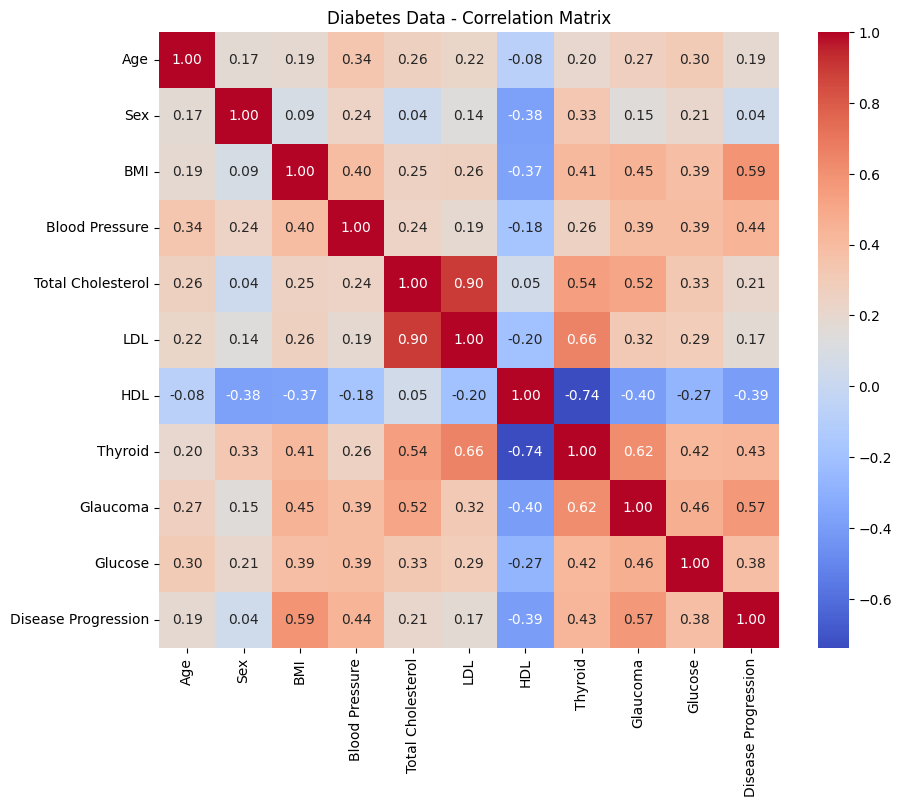

MAE of the linear regression model: 42.79
MAE of the baseline model: 62.59


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Load the diabetes dataset
diabetes = load_diabetes()

# Assign features (X) and target (y)
X = diabetes.data
y = diabetes.target

# Rename the columns
column_names = {'age': 'Age', 'sex': 'Sex', 'bmi': 'BMI', 'bp': 'Blood Pressure',
                's1': 'Total Cholesterol', 's2': 'LDL', 's3': 'HDL',
                's4': 'Thyroid', 's5': 'Glaucoma', 's6': 'Glucose'}
df = pd.DataFrame(X, columns=[column_names[col] for col in diabetes.feature_names])
df['Disease Progression'] = y

# Show a few rows of the diabetes data (features and target in a table)
print("Diabetes Data (Features and Target):")
display(df.head())

# Plot the correlation matrix as a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Diabetes Data - Correlation Matrix")
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utilize linear regression to predict the target variable
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance using MAE
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the MAE for the baseline model
baseline_pred = [np.median(y)] * len(y_test)
baseline_mae = mean_absolute_error(y_test, baseline_pred)

# Print MAEs
print(f"MAE of the linear regression model: {mae:.2f}")
print(f"MAE of the baseline model: {baseline_mae:.2f}")


**Prompt**:
> Analyze the impact of each feature in a linear regression model in the following steps:
1. Retrieve the weights assigned to each feature.
2. Create a plot of the weights, where the feature names are displayed on the y-axis with different colors. The feature names should be arranged in increasing order of the absolute values of their corresponding weights.

> Show python code.


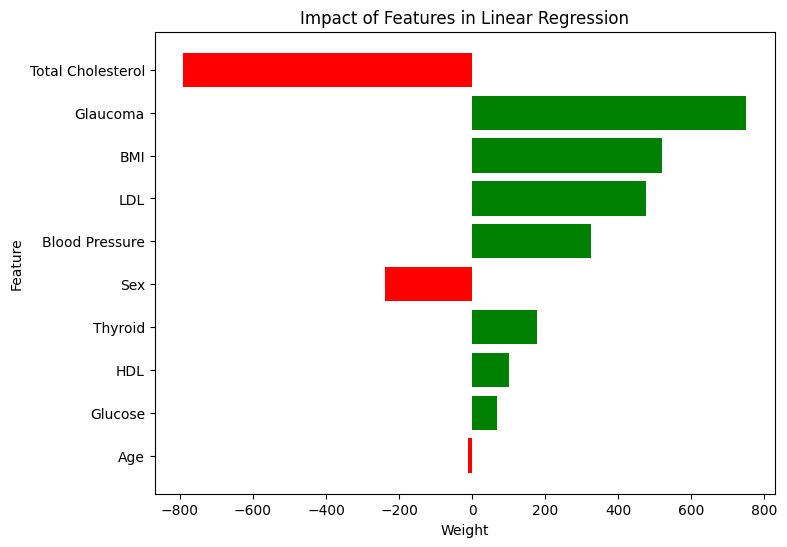

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# Step 1: Load the data and assign it to X and y
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Step 2: Rename the columns
column_names = {
    'age': 'Age',
    'sex': 'Sex',
    'bmi': 'BMI',
    'bp': 'Blood Pressure',
    's1': 'Total Cholesterol',
    's2': 'LDL',
    's3': 'HDL',
    's4': 'Thyroid',
    's5': 'Glaucoma',
    's6': 'Glucose'
}
X.rename(columns=column_names, inplace=True)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 1: Retrieve the weights assigned to each feature
feature_weights = model.coef_

# Step 2: Create a plot of the weights, arranged by the absolute values of weights
sorted_indices = np.argsort(np.abs(feature_weights))
sorted_feature_names = X.columns[sorted_indices]
sorted_weights = feature_weights[sorted_indices]

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_feature_names)), sorted_weights, color=['r' if w < 0 else 'g' for w in sorted_weights])
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Impact of Features in Linear Regression')
plt.show()

# Decision Tree

**Prompt**:
> Use the diabetes data from scikit-learn. preprocess the data as follows:
1.	Load the data and assign it to X, and the target to y. The target variable represents disease progression.
2.	Rename the columns to make them more understandable, as shown here:
```python
{'age': 'Age', 'sex': 'Sex', 'bmi': 'BMI', 'bp': 'Blood Pressure',
's1': 'Total Cholesterol', 's2': 'LDL', 's3': 'HDL',
's4': 'Thyroid', 's5': 'Glaucoma', 's6': 'Glucose'}
```
In this context, BP stands for blood pressure, and BMI refers to body mass index. The other six columns correspond to blood sample measurements.

> Perform the following steps to analyze the data:
1.	Split the data into training and test sets, allocating 80% of the data for training and 20% for testing.
2.	Utilize a decision tree model to predict the target variable.
3.	Evaluate the model's performance using the mean absolute error (MAE) metric.
4.	Visualize the decision tree.
5.	Plot the feature importance for the diabetes dataset using the decision tree model. Display the feature names on the y-axis with different colors. Arrange the feature names in increasing order of importance.

> Show python code.

Mean Absolute Error (MAE): 48.0965923002249


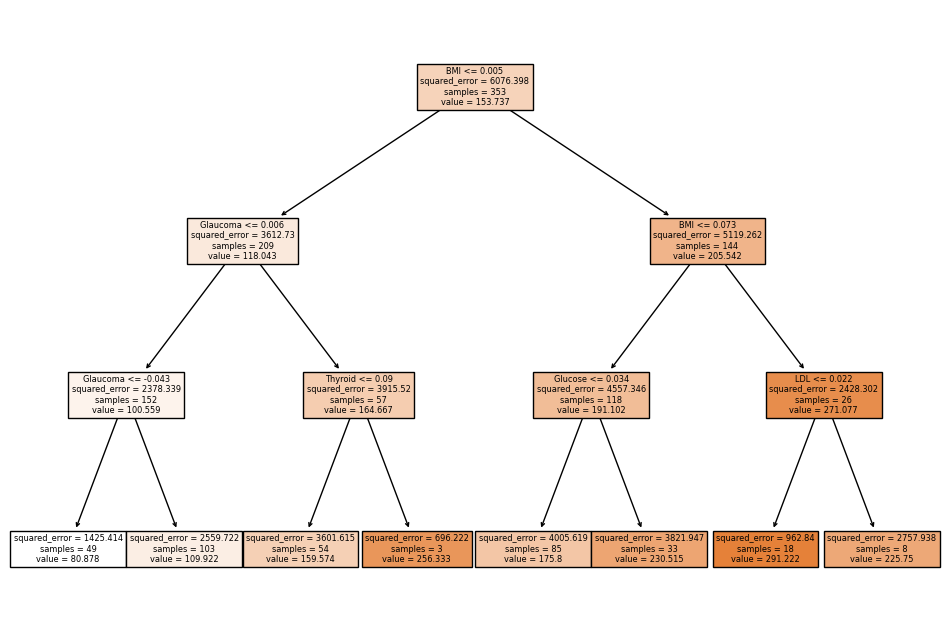

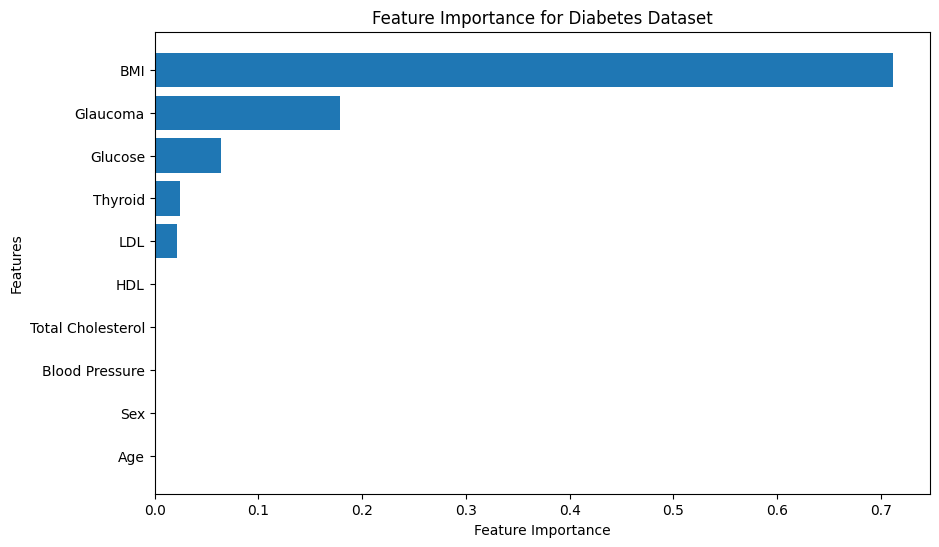

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn import tree

# Load the diabetes dataset
diabetes = load_diabetes()

# Assign features (X) and target variable (y)
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Rename the columns
column_names = {'age': 'Age', 'sex': 'Sex', 'bmi': 'BMI', 'bp': 'Blood Pressure',
                's1': 'Total Cholesterol', 's2': 'LDL', 's3': 'HDL',
                's4': 'Thyroid', 's5': 'Glaucoma', 's6': 'Glucose'}
X.rename(columns=column_names, inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

# Plot the feature importance
feature_importance = model.feature_importances_
sorted_indices = np.argsort(feature_importance)
sorted_features = X.columns[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importance[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Diabetes Dataset')
plt.show()

### ChatGPT ignores the requirements on different colors
### User code to generate colored chart
# feature_importance = model.feature_importances_
# sorted_indices = np.argsort(feature_importance)
# sorted_features = X.columns[sorted_indices]
# import matplotlib
# sorted_importances = feature_importance[sorted_indices]
# cmap = matplotlib.colormaps['viridis']
# colors = cmap(sorted_importances)
# plt.figure(figsize=(10, 6))
# plt.barh(sorted_features, feature_importance[sorted_indices], color=colors)
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance for Diabetes Dataset')
# plt.show()


Use max_depth to understand overfitting
```python
model = DecisionTreeRegressor(max_depth=3, random_state=42)
```

# Generalized Additive Models (GAMs)

**Prompt**:
> Use the diabetes data from scikit-learn. preprocess the data as follows:
1. Load the data and assign it to X, and the target to y. The target variable represents disease progression.
2. Rename the columns to make them more understandable, as shown here:
```python
{'age': 'Age', 'sex': 'Sex', 'bmi': 'BMI', 'bp': 'Blood Pressure',
's1': 'Total Cholesterol', 's2': 'LDL', 's3': 'HDL',
's4': 'Thyroid', 's5': 'Glaucoma', 's6': 'Glucose'}
```
In this context, BP stands for blood pressure, and BMI refers to body mass index. The other six columns correspond to blood sample measurements.

> Perform the following steps to analyze the data:
1. Split the data into training and test sets, allocating 80% of the data for training and 20% for testing.
2. Utilize a generalized additive model (GAM) to predict the target variable.
3. Evaluate the model's performance using the mean absolute error (MAE) metric.
4. Plot the effect of each of the patient features on the target variable with 95% confidence intervals.

> Show python code.


Use gam.gridsearch to perform training and determine optimal parameter values. Use factor term for the Sex feature, which is the second feature. Use Cubic spline term for all the other features. Set the maximum number of splines to 35.

In [ ]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


Mean Absolute Error (MAE): 50.83968884438925


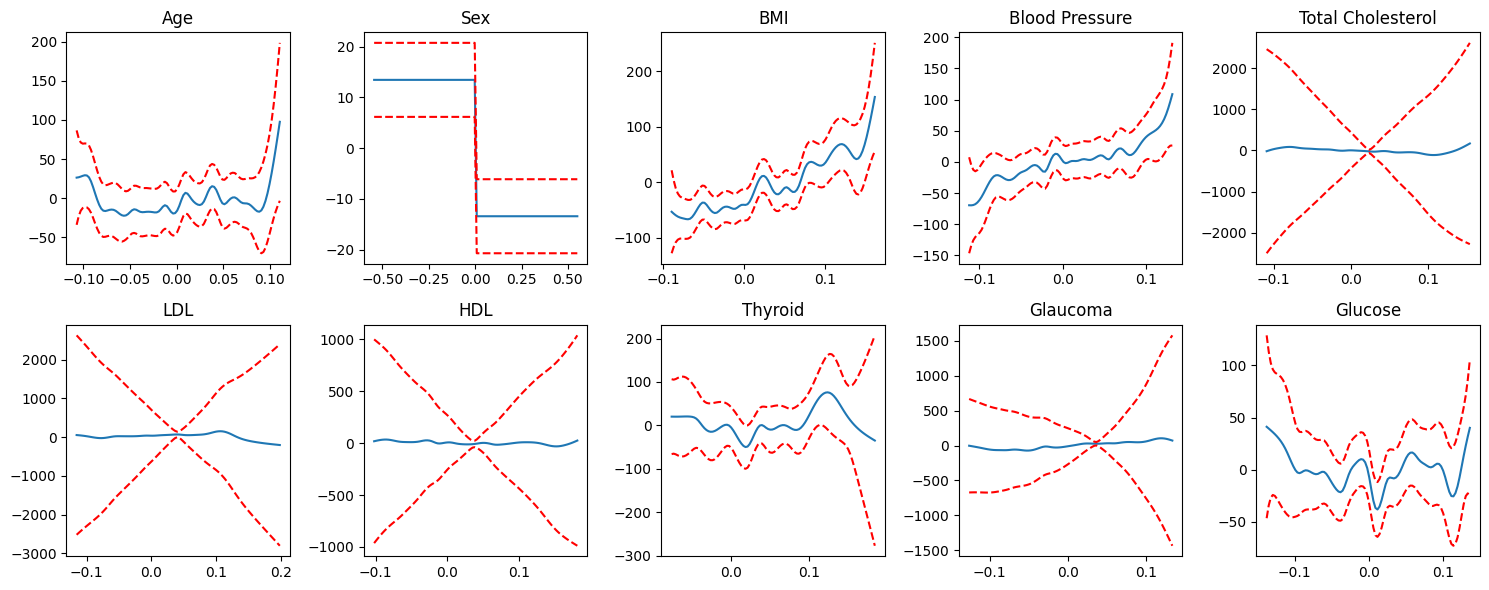

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from pygam import LinearGAM, s, f
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()

# Assign features (X) and target variable (y)
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Rename the columns
column_names = {'age': 'Age', 'sex': 'Sex', 'bmi': 'BMI', 'bp': 'Blood Pressure',
                's1': 'Total Cholesterol', 's2': 'LDL', 's3': 'HDL',
                's4': 'Thyroid', 's5': 'Glaucoma', 's6': 'Glucose'}
X.rename(columns=column_names, inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a generalized additive model (GAM)
model = LinearGAM(s(0) + f(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9), n_splines=35).fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the effect of each patient feature on the target variable with 95% confidence intervals
fig, axs = plt.subplots(2, X.shape[1] // 2, figsize=(15, 6))

for i, feature in enumerate(X.columns):
    row = i // (X.shape[1] // 2)
    col = i % (X.shape[1] // 2)
    XX = model.generate_X_grid(term=i)
    axs[row, col].plot(XX[:, i], model.partial_dependence(term=i, X=XX))
    axs[row, col].plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    axs[row, col].set_title(feature)

plt.tight_layout()
plt.show()


100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


Mean Absolute Error (MAE): 41.38


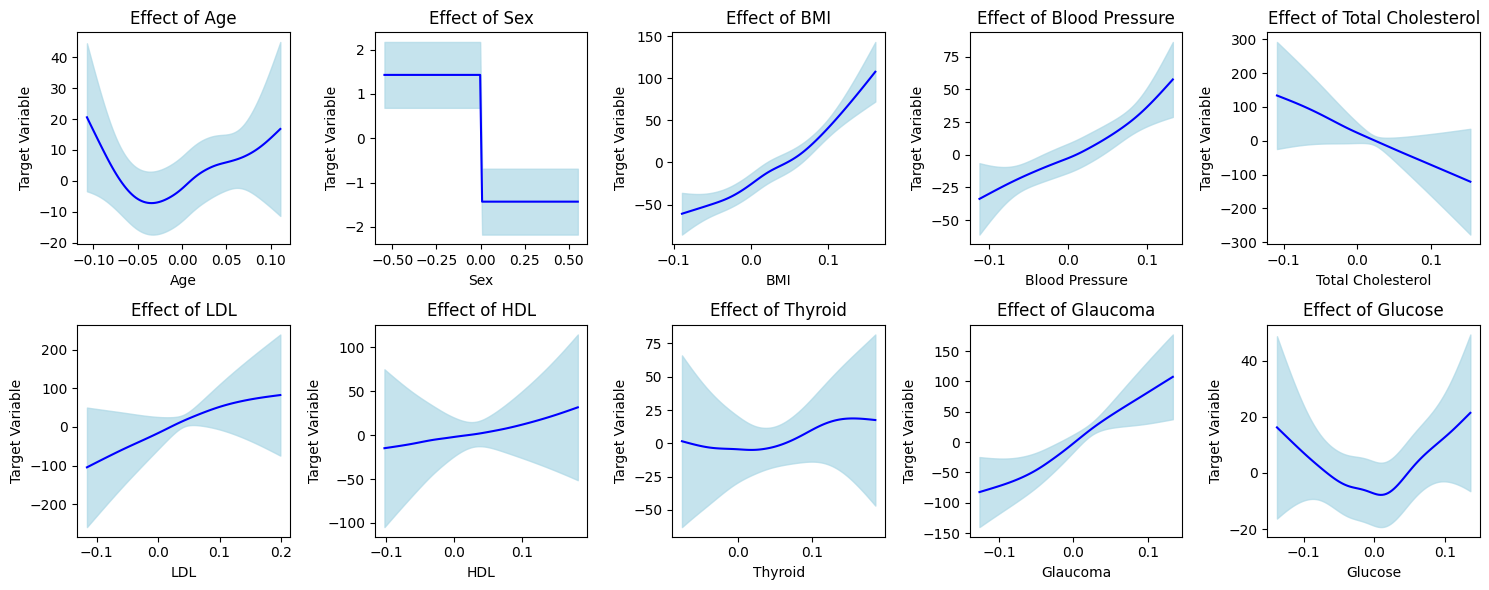

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from pygam import LinearGAM, s, f, l
from sklearn.metrics import mean_absolute_error

# Step 1: Load the data and assign it to X, and the target to y
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Step 2: Rename the columns
column_names = {'age': 'Age', 'sex': 'Sex', 'bmi': 'BMI', 'bp': 'Blood Pressure',
                's1': 'Total Cholesterol', 's2': 'LDL', 's3': 'HDL', 's4': 'Thyroid',
                's5': 'Glaucoma', 's6': 'Glucose'}
feature_names = [column_names[col] for col in diabetes.feature_names]

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Utilize a generalized additive model (GAM) with grid search for hyperparameter tuning
gam = LinearGAM(s(0) + f(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9), n_splines=35)

# Step 5: Fit the model on the training data
gam.gridsearch(X_train, y_train)
# gam.fit(X_train, y_train)

# Step 6: Evaluate the model's performance using mean absolute error (MAE) metric
y_pred = gam.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Step 7: Plot the effect of each patient feature on the target variable with 95% confidence intervals
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

for i in range(X.shape[1]):
    XX = gam.generate_X_grid(term=i)
    partial_dependence, confidence_intervals = gam.partial_dependence(term=i, X=XX, width=0.95)

    axs[i].plot(XX[:, i], partial_dependence, color='blue')
    axs[i].fill_between(XX[:, i], confidence_intervals[:, 0], confidence_intervals[:, 1], color='lightblue', alpha=0.7)
    axs[i].set_xlabel(feature_names[i])
    axs[i].set_ylabel('Target Variable')
    axs[i].set_title(f'Effect of {feature_names[i]}')

plt.tight_layout()
plt.show()
